## Purpose

I found this neat dataset on the UCI ML repository that had some interesting time series open [datasets](https://archive.ics.uci.edu/ml/datasets/Diabetes). This includes the data for 70 patients that I'll explore more closely. I'll begin by looking at the data for only one patient.

[Formatting Data](#Formatting Data)

[Visualizing data](#Visualizing Data)

[Splitting Data](#Splitting Data)

[Modeling Data](#Modeling Data)

[Model Validation](#Model Validation)

## Formatting Data

<a id='Formatting Data'></a>

Interesting. I thought that the data that I was looking at was just blood glucose values at different times, with different events occurring. However, after reading this closer, it seems less clear that this may not necessarily be the case. Although there are a lot of reasonable values in the 'Value' field (eg. between 80-250), there are also a lot of 0-10 values which are not realistic. The documentation for the data isn't too useful. It just says that there is a code for the activity (which could've occurred at same datetime). 

I think that the 'Value' column isn't just blood-glucose, it's more realistic that it represents the value of the [code activity](https://archive.ics.uci.edu/ml/datasets/Diabetes). If that's the case, then I can just find the codes that I know are glucose measurements in order to get timelapse bg measurements :)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
%matplotlib nbagg

In [67]:
#Here's the key of codes:

codes= {
    33 : 'Regular insulin dose', 34 : 'NPH insulin dose', 
    35 : 'UltraLente insulin dose' ,48 : 'Unspecified blood glucose measurement', 
    57 : 'Unspecified blood glucose measurement', 58: 'Pre-breakfast blood glucose measurement', 
    59 : 'Post-breakfast blood glucose measurement', 60 : 'Pre-lunch blood glucose measurement', 
    61 : 'Post-lunch blood glucose measurement', 62 : 'Pre-supper blood glucose measurement', 
    63 : 'Post-supper blood glucose measurement', 64 : 'Pre-snack blood glucose measurement', 
    65 : 'Hypoglycemic symptoms', 66 : 'Typical meal ingestion', 
    67 : 'More-than-usual meal ingestion', 68 : 'Less-than-usual meal ingestion', 
    69 : 'Typical exercise activity', 70 : 'More-than-usual exercise activity', 
    71 : 'Less-than-usual exercise activity', 72 : 'Unspecified special event'
        }

glucose_codes= [48, 57, 58, 59, 60, 61, 62, 63, 64]

In [50]:
data01= pd.read_csv('Diabetes-Data/data-01', sep= '\t', header = None)
data01.columns= ['date','time','code','bg_value']
data01.head()

,date,time,code,bg_value
0,04-21-1991,9:09,58,100
1,04-21-1991,9:09,33,9
2,04-21-1991,9:09,34,13
3,04-21-1991,17:08,62,119
4,04-21-1991,17:08,33,7


In [51]:
data01['datetime']= pd.to_datetime(data01['date']+' '+data01['time'])
data01= data01.drop(['date','time'], axis= 1)
data01.head()

,code,bg_value,datetime
0,58,100,1991-04-21 09:09:00
1,33,9,1991-04-21 09:09:00
2,34,13,1991-04-21 09:09:00
3,62,119,1991-04-21 17:08:00
4,33,7,1991-04-21 17:08:00


In [101]:
#Now let's filter the data so we only see glucose measurement data
glucoseOnly= data01[data01['code'].isin(glucose_codes)]


print 'These are the unique types of glucose measurements that are in our dataset: {}'.format(glucoseOnly['code'].unique())

glucoseOnly.head(5)

These are the unique types of glucose measurements that are in our dataset: [58 62 48 60]


,code,bg_value,datetime
0,58,100,1991-04-21 09:09:00
3,62,119,1991-04-21 17:08:00
5,48,123,1991-04-21 22:51:00
6,58,216,1991-04-22 07:35:00
10,62,211,1991-04-22 16:56:00


Excellent, now we know we only have codes 58, 62, 48, and 60 in our glucoseOnly table representing 'Pre-breakfast blood glucose measurement', 'Pre-supper blood glucose measurement', 'Unspecified blood glucose measurement', and 'Pre-lunch blood glucose measurement'.

Although there are other relevant codes, we can explore those later and at least visualize the data in the meantime.

## Visualizing Data

<a id='Visualizing Data'></a>

<IPython.core.display.Javascript object>


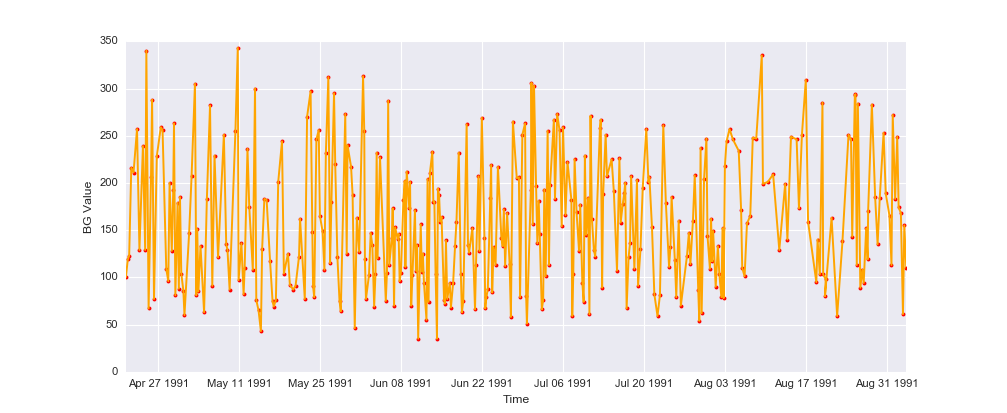

In [120]:
#Neat, now let's visualize the data over time!
plt.plot(glucoseOnly['datetime'], glucoseOnly['bg_value'], '.r')
plt.plot(glucoseOnly['datetime'], glucoseOnly['bg_value'], color= 'orange')
plt.xlabel('Time')
plt.ylabel('BG Value')

<IPython.core.display.Javascript object>


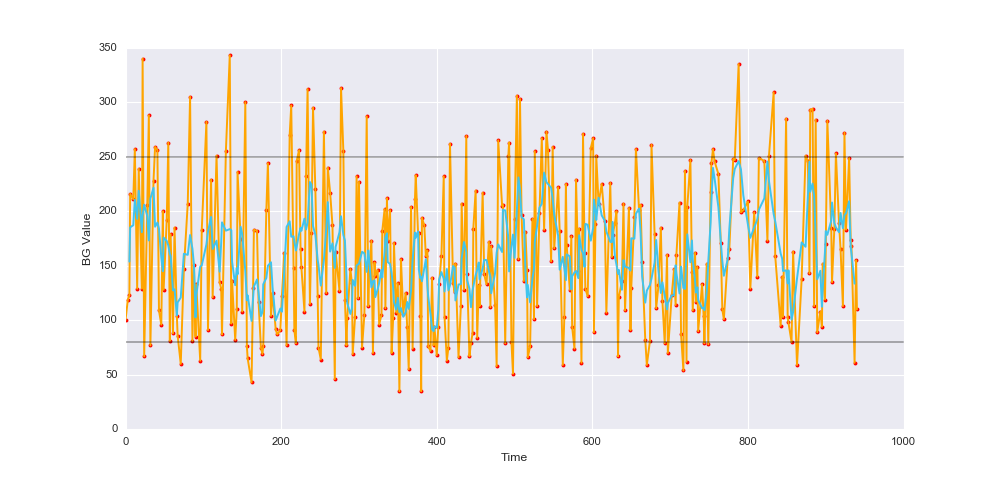

In [134]:
#Now let's plot the rolling average on top of these measurements
plt.plot(glucoseOnly['bg_value'], '.r')
plt.plot(glucoseOnly['bg_value'], color= 'orange')
plt.plot(pd.rolling_mean(glucoseOnly['bg_value'],5, center=True), color= '#40c4ed')

#Let's also plot the thresholds for typical thresholds (below healthy range= 80, and above range = 250)
plt.plot([250]*1000, marker= '_', color= 'k', alpha= 0.3)
plt.plot([80]*1000, marker= '_', color= 'k', alpha= 0.3)

plt.xlabel('Time')
plt.ylabel('BG Value')

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>